In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

C:\Users\Dyego\anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
tk = ['PG', 'MSFT', 'F', 'GE']
mydata = pd.DataFrame()
for i in tk:
    mydata[i] = wb.DataReader(i, data_source='yahoo', start='1995-1-1')['Adj Close']

In [3]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6612 entries, 1995-01-03 to 2021-04-07
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PG      6612 non-null   float64
 1   MSFT    6612 non-null   float64
 2   F       6612 non-null   float64
 3   GE      6612 non-null   float64
dtypes: float64(4)
memory usage: 258.3 KB


In [4]:
mydata.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,8.166473,2.389259,4.380183,4.119593
1995-01-04,8.101009,2.406627,4.498034,4.119593
1995-01-05,7.986450,2.366929,4.458752,4.129690
1995-01-06,8.002816,2.406627,4.458752,4.109495
1995-01-09,7.970086,2.391740,4.537320,4.069108


In [5]:
mydata.tail()

,PG,MSFT,F,GE
Date,,,,
2021-03-31,135.429993,235.770004,12.25,13.13
2021-04-01,134.279999,242.350006,12.17,13.28
2021-04-05,136.449997,249.070007,12.70,13.46
2021-04-06,136.500000,247.860001,12.92,13.40
2021-04-07,136.740005,249.899994,12.73,13.39


In [7]:
mydata.iloc[0]

PG      8.166473
MSFT    2.389259
F       4.380183
GE      4.119593
Name: 1995-01-03 00:00:00, dtype: float64

In [9]:
normalizado = (mydata / mydata.iloc[0] * 100)

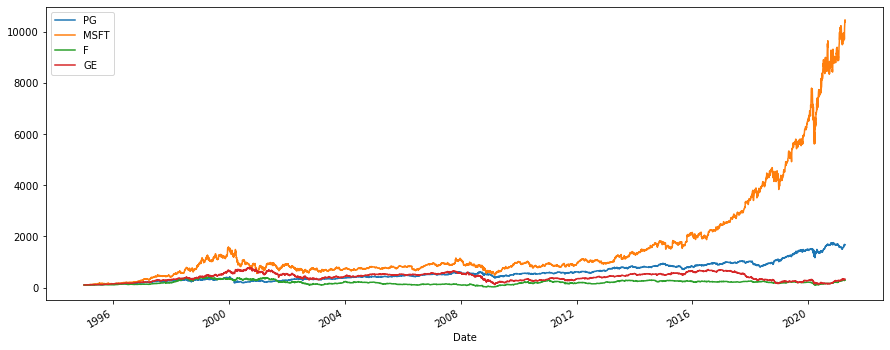

In [10]:
normalizado.plot(figsize=(15,6))

### Calculando o retorno do Portifolio e o peso dos papeis

In [26]:
retorno = (mydata / mydata.shift(1)) -1
retorno.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,NaN,NaN,NaN,NaN
1995-01-04,-0.008016,0.007269,0.026905,0.000000
1995-01-05,-0.014141,-0.016495,-0.008733,0.002451
1995-01-06,0.002049,0.016772,0.000000,-0.004890
1995-01-09,-0.004090,-0.006186,0.017621,-0.009828


In [27]:
peso = np.array([0.25, 0.25, 0.25, 0.25])

In [28]:
peso_individual = np.dot(retorno, peso)
peso_individual

array([        nan,  0.00653957, -0.00922966, ...,  0.02524817,
        0.00209338, -0.00136586])

In [29]:
retorno.mean()

PG      0.000528
MSFT    0.000903
F       0.000480
GE      0.000385
dtype: float64

In [30]:
retorno_anual = retorno.mean()*250
retorno_anual

PG      0.132082
MSFT    0.225674
F       0.119985
GE      0.096172
dtype: float64

In [31]:
retorno_anual_carteira = np.dot(retorno_anual, peso)
retorno_anual_carteira

0.14347817591480555

In [32]:
ptf1 = (str(round(np.dot(retorno_anual, peso), 4) * 100) + '%')

In [33]:
ptf1

'14.35%'

In [35]:
peso2 = np.array([0.4, 0.4, 0.15, 0.05])

In [36]:
ptf2 = (str(round(np.dot(retorno_anual, peso2), 4) * 100) + '%')

In [39]:
print(ptf1)
print(ptf2)

14.35%
16.59%
